In [75]:
#preamble 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
import qiskit
import random
import pandas as pd
import numpy as np 
from qiskit.providers.ibmq import IBMQJob
from qiskit.providers.ibmq.job import job_monitor
import pandas as pd


## n = 2
q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
qc = []
qc.append(QuantumCircuit(q, c))



count = 0
for i in range(10):
    for j in range(5):
        qc[count].id(0)
        qc[count].id(1)
        qc.append(QuantumCircuit(q,c))
    count = count + 1

# Do it for both qubits
       





In [2]:
#defining circuits

def circuit(n_circ,n_idgate): 
    qc = []
    for i in range(n_circ):  # no. of circuits
        n = 2
        q = QuantumRegister(n, 'q')
        c = ClassicalRegister(n, 'c')
        qc.append(QuantumCircuit(q,c))
        for j in range(n_idgate):
            qc[i].id(0)
            qc[i].id(1)
        qc[i].measure(q,c)
        
    return(qc)
        
    


 
    

In [ ]:
# 5 to 20 identity gates

In [3]:
#saving account
IBMQ.save_account('e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d')

configrc.store_credentials:WARNING:2020-10-26 22:44:22,923: Credentials already present. Set overwrite=True to overwrite.


In [4]:
#loading account
IBMQ.load_account()




<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
#checking backends
provider = IBMQ.get_provider()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
path = '/Users/student/Documents/summer_research/circuit_results/project2/'

In [ ]:
backend = provider.get_backend('ibmq_ourense')
output = []
for i in range(1,15):
    n = 75 # total number of circuits for each number of identity gates. 
    circ = circuit(n, i)
    job_exp = qiskit.execute(circ,backend=backend,shots = 8132)
    print(i)
    job_monitor(job_exp)
    output = job_exp.result().get_counts()
    df = pd.DataFrame(output)
    df.to_csv(path + str(i) + 'idgates.csv')
    
    
    
    
      
    
    



    


1
Job Status: job has successfully run                        
2
Job Status: RUNNING - fairshare                             

In [89]:
outcome = []

import csv
with open(path + "1idgates.csv") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        row = row[1:5]
        outcome.append(row)

In [90]:
output = []
for i in range(1,len(outcome)):
    for j in range(len(outcome[0])):
        if outcome[i][j] == '':
            outcome[i][j] = 0
        else:    
            outcome[i][j] = int(float(outcome[i][j]))
    output.append(dict(zip(outcome[0], outcome[i])))
output
   

[{'10': 166, '00': 7863, '11': 3, '01': 100},
 {'10': 153, '00': 7887, '11': 2, '01': 90},
 {'10': 161, '00': 7890, '11': 2, '01': 79},
 {'10': 144, '00': 7912, '11': 6, '01': 70},
 {'10': 151, '00': 7903, '11': 1, '01': 77},
 {'10': 164, '00': 7896, '11': 2, '01': 70},
 {'10': 165, '00': 7878, '11': 2, '01': 87},
 {'10': 149, '00': 7912, '11': 2, '01': 69},
 {'10': 162, '00': 7903, '11': 2, '01': 65},
 {'10': 176, '00': 7875, '11': 2, '01': 79},
 {'10': 141, '00': 7901, '11': 4, '01': 86},
 {'10': 162, '00': 7889, '11': 3, '01': 78},
 {'10': 159, '00': 7893, '11': 1, '01': 79},
 {'10': 150, '00': 7890, '11': 3, '01': 89},
 {'10': 169, '00': 7879, '11': 4, '01': 80},
 {'10': 145, '00': 7906, '11': 2, '01': 79},
 {'10': 138, '00': 7916, '11': 0, '01': 78},
 {'10': 140, '00': 7915, '11': 2, '01': 75},
 {'10': 161, '00': 7899, '11': 3, '01': 69},
 {'10': 148, '00': 7913, '11': 5, '01': 66},
 {'10': 140, '00': 7892, '11': 3, '01': 97},
 {'10': 148, '00': 7896, '11': 2, '01': 86},
 {'10': 1

In [85]:
#finding the probabilty for p00,p01,p10,p11
for i in range(len(output)):
    if '00' in output[i]:
        output[i]['00'] = output[i]['00']/8132
    if '01' in output[i]:
        output[i]['01'] = output[i]['01']/8132
    if '10' in output[i]:
        output[i]['10'] = output[i]['10']/8132
    if '11' in output[i]:
        output[i]['11'] = output[i]['11']/8132
        
 

In [87]:
output

[{'10': 2.2834011075009513e-06,
  '00': 0.00011943246322544713,
  '11': 3.02437232781583e-08,
  '01': 1.224870792765411e-06},
 {'10': 2.2834011075009513e-06,
  '00': 0.00011943246322544713,
  '11': 3.02437232781583e-08,
  '01': 1.224870792765411e-06},
 {'10': 2.2834011075009513e-06,
  '00': 0.00011943246322544713,
  '11': 3.02437232781583e-08,
  '01': 1.224870792765411e-06},
 {'10': 2.2834011075009513e-06,
  '00': 0.00011943246322544713,
  '11': 3.02437232781583e-08,
  '01': 1.224870792765411e-06},
 {'10': 0.018568617806197736,
  '00': 0.971839645843581,
  '11': 0.00012297097884899163,
  '01': 0.009468765371372355},
 {'10': 0.02016724053123463,
  '00': 0.970978848991638,
  '11': 0.00024594195769798326,
  '01': 0.008607968519429415},
 {'10': 0.02029021151008362,
  '00': 0.9687653713723561,
  '11': 0.00024594195769798326,
  '01': 0.010698475159862272},
 {'10': 0.018322675848499753,
  '00': 0.9729463846532218,
  '11': 0.00024594195769798326,
  '01': 0.008484997540580424},
 {'10': 0.019921

#Reason behind relative entropy (defining p_0,p_0',p_1,p_1'  to get q00,q01,...)
p_00 = p_0 * p_0’

Independent events: 


In |0>

p_0 = p_00 + p_10
p_1 = p_01 + p_11


In |1>

p_0’ = p_00 + p_01
p_1’ = p_10 + p_11




If we have independent events:

p_0 * p_0’ = q00
p_0 * p_1’ = q10
p_1 * p_0’ = q01
p_1 * p_1’ = q11


If equal then no correlation. If deviation between two of them then it gives us the correlation.




Syntax:
p_x’ = prob of measuring of getting x in the second qubit(|1>)
p_x =  prob of measuring of getting x in the first qubit(|0>)




In [4]:
#creating list for p_0,p_0_, p_1, p_1_
p_0 = []
p_0_ = []
p_1 = []
p_1_ = []

for i in range(len(output)):
    if '00' in output[i] and '01' in output[i]:
        p_0_.append(output[i]['00'] + output[i]['01'])
    elif '00' in output[i]:
        p_0_.append(output[i]['00'])
    elif '01' in output[i]:
        p_0_.append(output[i]['00'])
    else:
        p_0_.append(0)
    if '10' in output[i] and '11' in output[i]:
        p_1_.append(output[i]['10'] + output[i]['11'])
    elif '10' in output[i]:
        p_1_.append(output[i]['10'])
    elif '11' in output[i]:
        p_1_.append(output[i]['11'])
    else:
        p_1_.append(0)
    if '00' in output[i] and '10' in output[i]:
        p_0.append(output[i]['00'] + output[i]['10'])
    elif '00' in output[i]:
        p_0.append(output[i]['00'])
    elif '10' in output[i]:
        p_0.append(output[i]['10'])
    else:
        p_0.append(0)
    if '01' in output[i] and '11' in output[i]:
        p_1.append(output[i]['01'] + output[i]['11'])
    elif '01' in output[i]:
        p_1.append(output[i]['01'])
    elif '11' in output[i]:
        p_1.append(output[i]['11'])
    else:
        p_1.append(0)
        


In [5]:
 p_1_[9] + p_0_[9]

1.0

In [6]:
#double checking the length of p_0, p_1...
len(p_0),len(p_0_),len(p_1),len(p_1_)

(20, 20, 20, 20)

In [10]:
#defining the q_s based on the independence of the events. 
'''
q00 = p_0 * p_0’  
q10 = p_0 * p_1’ 
q01 = p_1 * p_0’ 
q11 = p_1 * p_1’ 

'''


q00 = []
q01 = []
q10 = []
q11 = []


for i in range(len(p_0)):
    q00.append(p_0[i] * p_0_[i])
    q01.append(p_1[i] * p_0_[i])
    q10.append(p_0[i] * p_1_[i])
    q11.append(p_1[i] * p_1_[i])


In [11]:
#double check the length of q_s
len(q00),len(q01),len(q10),len(q11)

(20, 20, 20, 20)

In [12]:
#making the list of p00, p01,p10,p11 (the outputs from IBM Q)
p00 = []
p01 = []
p10 = []
p11 = []

for i in range(len(output)):
    if '00' in output[i]:
        p00.append(output[i]['00'])
    else: 
        p00.append(0)
    if '01' in output[i]:
        p01.append(output[i]['01'])
    else: 
        p01.append(0)
    if '10' in output[i]:
        p10.append(output[i]['10'])
    else: 
        p10.append(0)
    if '11' in output[i]:
        p11.append(output[i]['11'])
    else: 
        p11.append(0)
    
  

In [13]:
#create p (list of p00,p01,p10,p11 for each output)
p = []
for i in range(len(p00)):
    p.append([p00[i],p01[i],p10[i],p11[i]])
   


In [14]:
#create q (list of q00,q01,q10,q11 for each output)
q = []
for i in range(len(q00)):
    q.append([q00[i],q01[i],q10[i],q11[i]])

In [25]:
len(p),len(q)

(20, 20)

In [19]:
p[9][1]* (np.log(p[9][1]/q[9][1]))

6.218060869327271e-05

In [20]:
X = []
for i in range(4):
    X.append(p[9][i] * (np.log(p[9][i]/q[9][i])))
             
sum(X)

1.2094292700036351e-05

In [137]:
l = []
y = []
for i in range(2):
    y.append(l)
y

[[], []]

In [151]:
p[1][3] * (np.log(p[1][3]/q[1][3]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [153]:
B = []
A = []
for i in range(2):
    for j in range(4):
        if p[i][j]!= 0:
            print(p[i][j] * (np.log(p[i][j]/q[i][j])))
        else:
            print("Error")


6.735512212833842e-05
-6.719288801482533e-05
-6.724190117899265e-05
7.436957354683061e-05
-0.00028687955402432954
0.0002901271591068376
0.0002888086180430591
Error


In [34]:
#calculation of the relative entropy
X = []
D = []
A = len(q)
# A is the number of measurements which doesn't have three zeros. 
for i in range(A):
    for j in range(4):
        X.append(D)
        


In [43]:
#calculation of the relative entropy
X = []
D = []
A = len(q)
# A is the number of measurements which doesn't have three zeros. 
for i in range(A):
    X.append([p[i][0] * (np.log(p[i][0]/q[i][0])), p[i][1] * (np.log(p[i][1]/q[i][1])), 
            p[i][2] * (np.log(p[i][2]/q[i][2])), p[i][3] * (np.log(p[i][3]/q[i][3]))])
X

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


[[6.735512212833842e-05,
  -6.719288801482533e-05,
  -6.724190117899265e-05,
  7.436957354683061e-05],
 [-0.00028687955402432954, 0.0002901271591068376, 0.0002888086180430591, nan],
 [0.0003776966997098991,
  -0.00037199622133557425,
  -0.00037362565178861835,
  0.0005855562710933076],
 [0.00010393814404944722,
  -0.00010347771400378157,
  -0.00010368095088149672,
  0.0001220750912596882],
 [0.00026885859138386193,
  -0.0002657750400889109,
  -0.0002668150661358485,
  0.0003889770682676237],
 [0.0001613334224366622,
  -0.00016019282076977517,
  -0.0001605688929176961,
  0.00021211816589594321],
 [-0.00014647437030135442,
  0.00014734756685887344,
  0.0001469950850008742,
  -9.646561829552107e-05],
 [0.0006435881331535699,
  -0.0006241334373824832,
  -0.0006324796920566984,
  0.0011844717769082804],
 [0.0005891155205332203,
  -0.0005744239849386989,
  -0.0005808396286608696,
  0.0009921271269910776],
 [-6.198253373783358e-05,
  6.218060869327271e-05,
  6.20888907326845e-05,
  -5.0192672

In [42]:
Y = []
for i in range(len(X)):
    Y.append(sum(X[i]))
Y

[7.289906481351046e-06,
 nan,
 0.0002176310976790141,
 1.8854570423857135e-05,
 0.00012524555342672622,
 5.268987464513415e-05,
 5.140266326287215e-05,
 0.0005714467806226687,
 0.0004259790339247295,
 1.2094292700036351e-05,
 1.8620962429981354e-05,
 0.00011096113196324,
 6.608530593415961e-05,
 5.178765691090932e-06,
 0.00024109791550513363,
 8.482119041074669e-05,
 2.5929262574549575e-07,
 8.843187095080202e-05,
 2.3402359769919914e-05,
 1.8293724792994762e-05]

In [53]:
Y_ = [x for x in Y if x == x]
Y_

np.mean(Y_),np.std(Y_)



(0.00011262033122316862, 0.0001499346984512427)

In [55]:
import pandas as pd    

mean_5id = [np.mean(Y_),np.std(Y_)]
df = pd.DataFrame(mean_5id)
df

,0
0,0.000113
1,0.000150


In [44]:
import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline

In [46]:
mean_X = np.mean(X)
std_X = np.std(X)


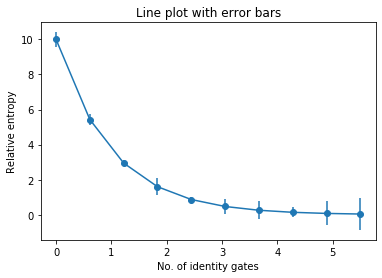

In [50]:
x = np.linspace(0,5.5,10)
y = 10*np.exp(-x)
yerr = np.random.random_sample(10)



fig, ax = plt.subplots()


ax.errorbar(x, y,
            yerr=yerr,
            fmt='-o')


ax.set_xlabel('No. of identity gates')
ax.set_ylabel('Relative entropy')
ax.set_title('Line plot with error bars')


plt.show()

In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
  
# Make the dataframe for evaluation on Errorbars 
df = pd.DataFrame({  
    'mean': [0.00011262033122316862,7.459153699994953e-05, 0.00012346106748283676     ,0.0011071830667655044 ], 
    'std': [0.0001499346984512427,7.703743712790897e-05,  0.0001393114280365509  ,5.95237759610749e-09 ]}) 
  
print(df)

       mean           std
0  0.000113  1.499347e-04
1  0.000075  7.703744e-05
2  0.000123  1.393114e-04
3  0.001107  5.952378e-09


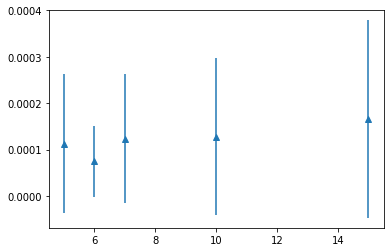

In [65]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5, 6, 7, 10, 15])
y = np.array([0.00011262033122316862,7.459153699994953e-05, 0.00012346106748283676 ,0.00012800186340509843, 0.00016565630235214893]) 
e = np.array([0.0001499346984512427,7.703743712790897e-05,  0.0001393114280365509  ,0.00016896914052333056, 0.00021305375361176305])

plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()